In [1]:
import tensorflow as tf
#tensorflow already contains mnist dataset which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist
#mnist dataset contains handwritten digits based on a 28*28 sized images of 0 to 9

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# returns a tuple of numpy arrays

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [13]:
print(x_train[-1])
#NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

In [5]:
import matplotlib.pyplot as plt

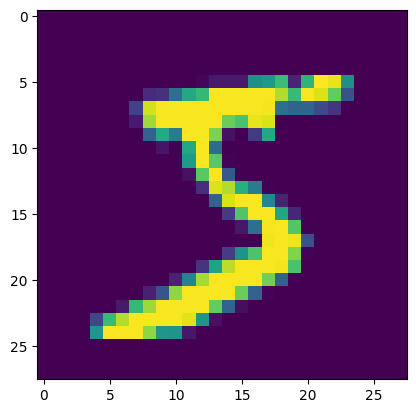

In [6]:
plt.imshow(x_train[0])
#imshow gives you the image once you feed rgb arrays

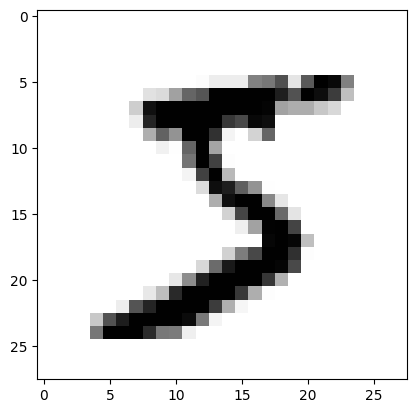

In [7]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)
#this is hsowing inverted image

In [8]:
print(y_train[0])

5


In [9]:
##Checking value of each pixel before normalisation
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

##Normalisation

In [10]:
# as we have values from 0 to 255 we have to normalise the data we have to divide the values by 255
#there is an in-built function to do this
x_train = tf.keras.utils.normalize(x_train , axis =1)
x_test  = tf.keras.utils.normalize(x_train , axis =1)


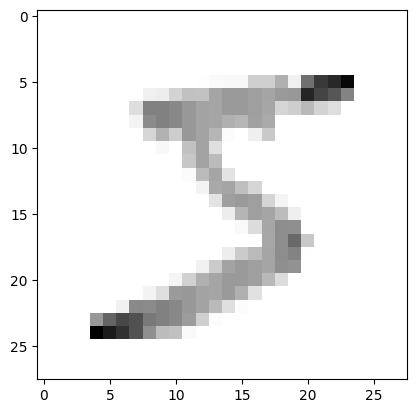

In [22]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing images to make it suitable for apply Convolution operation


In [12]:
import numpy as np
IMG_SIZE = 28

x_train_resize = np.array(x_train).reshape(-1, IMG_SIZE , IMG_SIZE , 1)
x_test_resize = np.array(x_test).reshape(-1, IMG_SIZE , IMG_SIZE , 1)
print(x_train_resize.shape)
print(x_test_resize.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


## Creating a Deep Neural Network


In [15]:
from tensorflow.keras.models import Sequential


In [17]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [20]:
model = Sequential()


##first convolution layer
model.add(Conv2D(64  , (3,3) , input_shape =x_train_resize.shape[1:])) #only for first input size layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##2nd layer
model.add(Conv2D(64  , (3,3) , input_shape =x_train_resize.shape[1:])) #only for first input size layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##3rd layer
model.add(Conv2D(64  , (3,3) , input_shape =x_train_resize.shape[1:])) #only for first input size layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

##fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

##last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [22]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = 'adam' , metrics = ['accuracy'])

In [24]:
# training the model
model.fit(x_train_resize , y_train , epochs = 5 , validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 92s 69ms/step - loss: 0.3182 - accuracy: 0.8994 - val_loss: 0.1196 - val_accuracy: 0.9634
Epoch 2/5
1313/1313 [==============================] - 85s 64ms/step - loss: 0.1047 - accuracy: 0.9685 - val_loss: 0.0840 - val_accuracy: 0.9736
Epoch 3/5
1313/1313 [==============================] - 87s 66ms/step - loss: 0.0756 - accuracy: 0.9763 - val_loss: 0.0740 - val_accuracy: 0.9772
Epoch 4/5
1313/1313 [==============================] - 88s 67ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0747 - val_accuracy: 0.9773
Epoch 5/5
1313/1313 [==============================] - 84s 64ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0630 - val_accuracy: 0.9807


In [25]:
predictions = model.predict(x_test_resize)

1875/1875 [==============================] - 35s 18ms/step


In [26]:
print(predictions)

[[5.9609982e-07 2.1985323e-05 5.4358516e-06 ... 2.3697536e-05
  2.0950851e-05 6.1169492e-05]
 [9.9991971e-01 4.6354506e-07 7.3312158e-08 ... 1.9222453e-07
  1.5850785e-06 5.8950660e-05]
 [4.9895885e-07 1.0684120e-04 1.1182093e-06 ... 5.0313516e-05
  1.4199408e-08 1.1337379e-05]
 ...
 [4.1589278e-08 1.2966177e-07 7.0550890e-08 ... 2.4527603e-07
  8.0701875e-07 5.1911076e-05]
 [5.3562544e-05 1.1190851e-06 8.4504876e-07 ... 5.8583902e-09
  4.7257603e-05 1.1090678e-05]
 [1.3644850e-06 1.0621756e-08 7.6997443e-05 ... 7.2576563e-06
  9.9964297e-01 2.4808830e-04]]


In [29]:
print(np.argmax(predictions[1]))

0


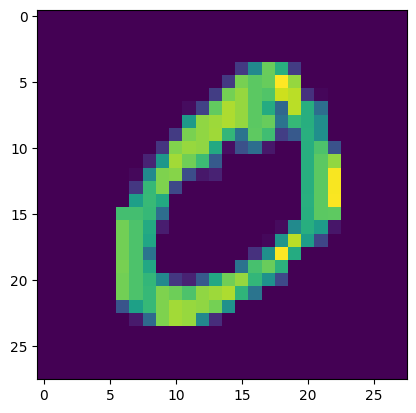

In [30]:
plt.imshow(x_train[1])

1


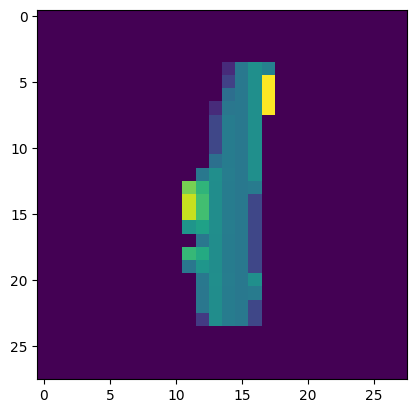

In [31]:
print(np.argmax(predictions[128]))
plt.imshow(x_train[128])

9


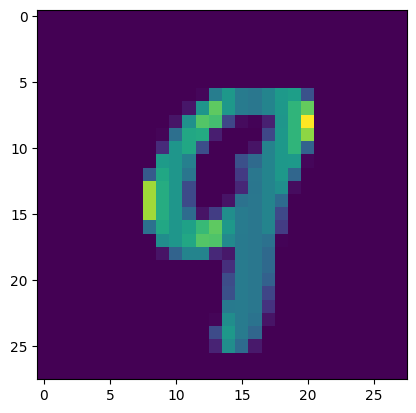

In [32]:
print(np.argmax(predictions[800]))
plt.imshow(x_train[800])

## Uploading custom image and checking it

In [33]:
import cv2

In [51]:
img = cv2.imread('3.png')

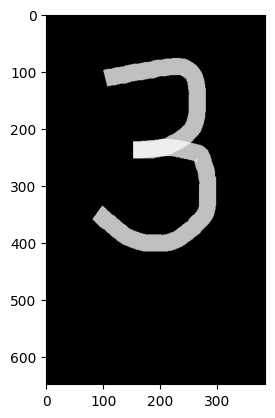

In [52]:
plt.imshow(img)

In [53]:
img.shape

(648, 384, 3)

In [54]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [55]:
resized = cv2.resize(gray, (28,28) , interpolation = cv2.INTER_AREA)

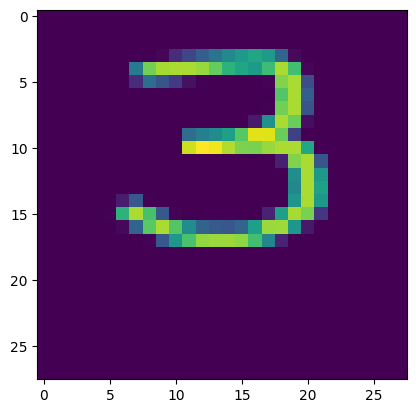

In [56]:
plt.imshow(resized)

In [57]:
resized.shape

(28, 28)

In [58]:
newimg = tf.keras.utils.normalize(resized , axis = 1)

In [59]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [60]:
newimg.shape

(1, 28, 28, 1)

In [61]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 31ms/step


In [62]:
print(np.argmax(predictions))

3


1/1 [==============================] - 0s 28ms/step
1


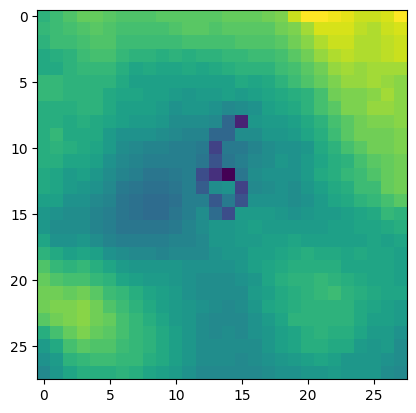

In [64]:
img = cv2.imread('6.jpg')
plt.imshow(img)
img.shape
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28) , interpolation = cv2.INTER_AREA)
plt.imshow(resized)
newimg = tf.keras.utils.normalize(resized , axis = 1)
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE,1)
predictions = model.predict(newimg)
print(np.argmax(predictions))

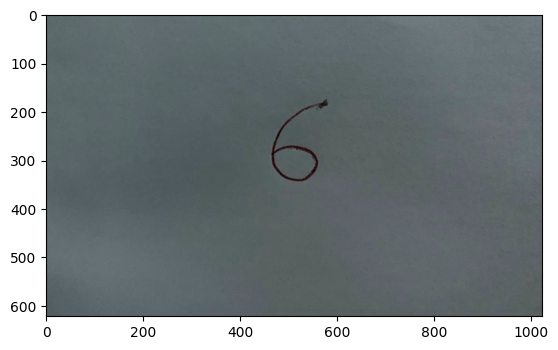

In [65]:
plt.imshow(img)